In [56]:
%load_ext autoreload
%autoreload 2

import torch
from torch.utils.data import DataLoader
from torchvision.utils import make_grid
import matplotlib.pyplot as plt

from hiegan.config import Config
from hiegan.dataset import ShapeNetMVDataset
# from hiegan.utils.mesh_utils import load_and_normalize_mesh, mesh_to_pointcloud
# from hiegan.utils.render_utils import simple_renderer, render_mesh_rgb


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [57]:
cfg = Config()
device = torch.device(cfg.DEVICE if torch.cuda.is_available() or cfg.DEVICE=="mps" else "cpu")
print("Using device:", device)

Using device: mps


In [68]:
# Dataset + Loader
ds = ShapeNetMVDataset(cfg.DATASET_ROOT, image_size=cfg.IMAGE_SIZE, multi_view=cfg.MULTI_VIEW)
print("Dataset size:", len(ds))
dl = DataLoader(ds, batch_size=1, shuffle=True, num_workers=0)

Dataset size: 9207


In [69]:
# Fetch one sample
imgs, mesh_path = next(iter(dl))
print("Images tensor shape (V,3,H,W):", imgs.shape)
print("Mesh path:", mesh_path)

Images tensor shape (V,3,H,W): torch.Size([1, 1, 3, 224, 224])
Mesh path: ('../data/ShapeNetCore.v2/02958343/18d9ac72442260e0e97c6bb243ef67d/model_normalized.obj',)


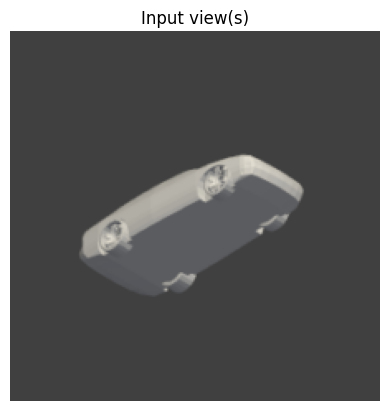

In [72]:
# Show the input image(s)
grid = make_grid(imgs, nrow=imgs.shape[0], normalize=True, value_range=(-1,1)).squeeze(0)
plt.figure()
plt.title("Input view(s)")
plt.axis("off")
plt.imshow(grid.permute(1,2,0).cpu())
plt.show()

In [ ]:
# Load & render the GT mesh
mesh = load_and_normalize_mesh(mesh_path[0], device=str(device))
renderer = simple_renderer(image_size=256, device=str(device))
rgb = render_mesh_rgb(mesh, renderer, device=str(device))[0].cpu().numpy()
plt.figure()
plt.title("GT Mesh quick render")
plt.axis("off")
plt.imshow(rgb)
plt.show()

In [ ]:
# Sample points for later metrics
pts = mesh_to_pointcloud(mesh, num_samples=2048)
print("Sampled pointcloud:", pts.shape)